In [2]:
from lib.rnn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Vanilla RNN: step forward

In [4]:
N, D, H = 3, 10, 4

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")
x = np.linspace(-0.4, 0.7, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.2, 0.5, num=N*H).reshape(N, H)

rnn.params[rnn.wx_name] = np.linspace(-0.1, 0.9, num=D*H).reshape(D, H)
rnn.params[rnn.wh_name] = np.linspace(-0.3, 0.7, num=H*H).reshape(H, H)
rnn.params[rnn.b_name] = np.linspace(-0.2, 0.4, num=H)

next_h, _ = rnn.step_forward(x, prev_h)
expected_next_h = np.asarray([
  [-0.58172089, -0.50182032, -0.41232771, -0.31410098],
  [ 0.66854692,  0.79562378,  0.87755553,  0.92795967],
  [ 0.97934501,  0.99144213,  0.99646691,  0.99854353]])

print('next_h error: ', rel_error(expected_next_h, next_h))

next_h error:  6.29242142647e-09


# Vanilla RNN: step backward

In [5]:
np.random.seed(599)
N, D, H = 4, 5, 6

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, D)
h = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out, meta = rnn.step_forward(x, h)

dnext_h = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: rnn.step_forward(x, h)[0], x, dnext_h)
dprev_h_num = eval_numerical_gradient_array(lambda h: rnn.step_forward(x, h)[0], h, dnext_h)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.step_forward(x, h)[0], Wx, dnext_h)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.step_forward(x, h)[0], Wh, dnext_h)
db_num = eval_numerical_gradient_array(lambda b: rnn.step_forward(x, h)[0], b, dnext_h)

dx, dprev_h, dWx, dWh, db = rnn.step_backward(dnext_h, meta)

print('dx error: ', rel_error(dx_num, dx))
print('dprev_h error: ', rel_error(dprev_h_num, dprev_h))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  1.05720381366e-10
dprev_h error:  5.79650093437e-10
dWx error:  3.85463040281e-10
dWh error:  1.58343560409e-10
db error:  2.01718247137e-11


# Vanilla RNN: forward

In [121]:
N, T, D, H = 2, 3, 4, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.linspace(-0.1, 0.3, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.3, 0.1, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.4, num=D*H).reshape(D, H)
Wh = np.linspace(-0.4, 0.1, num=H*H).reshape(H, H)
b = np.linspace(-0.7, 0.1, num=H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

h = rnn.forward(x, h0)
expected_h = np.asarray([
  [
    [-0.42070749, -0.27279261, -0.11074945,  0.05740409,  0.22236251],
    [-0.39525808, -0.22554661, -0.0409454,   0.14649412,  0.32397316],
    [-0.42305111, -0.24223728, -0.04287027,  0.15997045,  0.35014525],
  ],
  [
    [-0.55857474, -0.39065825, -0.19198182,  0.02378408,  0.23735671],
    [-0.27150199, -0.07088804,  0.13562939,  0.33099728,  0.50158768],
    [-0.51014825, -0.30524429, -0.06755202,  0.17806392,  0.40333043]]])
print('h error: ', rel_error(expected_h, h))

h error:  7.72846615831e-08


# Vanilla RNN: backward

In [7]:
np.random.seed(599)

N, D, T, H = 2, 3, 10, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out = rnn.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = rnn.backward(dout)

dx_num = eval_numerical_gradient_array(lambda x: rnn.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: rnn.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: rnn.forward(x, h0), b, dout)

dWx = rnn.grads[rnn.wx_name]
dWh = rnn.grads[rnn.wh_name]
db = rnn.grads[rnn.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  3.11708809916e-10
dh0 error:  1.7256625616e-10
dWx error:  4.81142047372e-09
dWh error:  5.48837659207e-10
db error:  2.49942128935e-10


# Word embedding: forward

In [8]:
N, T, V, D = 2, 4, 5, 3

we = word_embedding(V, D, name="we")

x = np.asarray([[0, 3, 1, 2], [2, 1, 0, 3]])
W = np.linspace(0, 1, num=V*D).reshape(V, D)

we.params[we.w_name] = W

out = we.forward(x)
expected_out = np.asarray([
 [[ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.42857143,  0.5,         0.57142857]],
 [[ 0.42857143,  0.5,         0.57142857],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429]]])

print('out error: ', rel_error(expected_out, out))

out error:  1.00000000947e-08


# Word embedding: backward

In [9]:
np.random.seed(599)

N, T, V, D = 50, 3, 5, 6

we = word_embedding(V, D, name="we")

x = np.random.randint(V, size=(N, T))
W = np.random.randn(V, D)

we.params[we.w_name] = W

out = we.forward(x)
dout = np.random.randn(*out.shape)
we.backward(dout)

dW = we.grads[we.w_name]

f = lambda W: we.forward(x)
dW_num = eval_numerical_gradient_array(f, W, dout)

print('dW error: ', rel_error(dW, dW_num))

dW error:  3.27593252242e-12


# Inline Question: Why do we want to represent words using word embeddings instead of one hot vector ( https://en.wikipedia.org/wiki/One-hot )? Provide one advantage of word embeddings.

#### Ans: One Hot vector for a word represents whether a word is present or not. It acts as a discrete feature and numbers of features of the models grows with the vocubalory size. Word embedding are vectors in the semantic feature space respresented by fixed number of dimensions where group of similar words are clustered together based on the cosine similarity. If we use one hot vectors, we will not be able to generalize for new words, whereas unknown words are projected on to the sematic space using cosine similarity will give reasonable representation of words. Word embedding use kernels to get a represenation of a word in lower dimension space without going to higher dimensional space. 


# Temporal Fully Connected layer
At every timestep we use an affine function to transform the RNN hidden vector at that timestep into scores for each word in the vocabulary. Because this is very similar to the fully connected layer that you implemented in assignment 1, we have provided this function for you in the `forward` and `backward` functions in the file `lib/layer_util.py`. Run the following to perform numeric gradient checking on the implementation. You should see errors less than 1e-9.

In [10]:
np.random.seed(599)

# Gradient check for temporal affine layer
N, T, D, M = 2, 3, 4, 5

t_fc = temporal_fc(D, M, init_scale=0.02, name='test_t_fc')

x = np.random.randn(N, T, D)
w = np.random.randn(D, M)
b = np.random.randn(M)

t_fc.params[t_fc.w_name] = w
t_fc.params[t_fc.b_name] = b

out = t_fc.forward(x)

dout = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: t_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: t_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: t_fc.forward(x), b, dout)

dx = t_fc.backward(dout)
dw = t_fc.grads[t_fc.w_name]
db = t_fc.grads[t_fc.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

dx error:  1.05895628938e-09
dw error:  1.16649300155e-10
db error:  1.85404883256e-11


# Temporal Softmax loss
In an RNN language model, at every timestep we produce a score for each word in the vocabulary. We know the ground-truth word at each timestep, so we use a softmax loss function to compute loss and gradient at each timestep. We sum the losses over time and average them over the minibatch.

We provide this loss function for you; look at the `temporal_softmax_loss` function in the file `lib/layer_utils.py`.

Run the following cell to sanity check the loss and perform numeric gradient checking on the function. You should see an error for dx less than 1e-7.

In [11]:
loss_func = temporal_softmax_loss()

# Sanity check for temporal softmax loss
N, T, V = 100, 1, 10

def check_loss(N, T, V, p):
    x = 0.001 * np.random.randn(N, T, V)
    y = np.random.randint(V, size=(N, T))
    mask = np.random.rand(N, T) <= p
    print(loss_func.forward(x, y, mask))
  
check_loss(100, 1, 10, 1.0)   # Should be about 2.3
check_loss(100, 10, 10, 1.0)  # Should be about 23
check_loss(5000, 10, 10, 0.1) # Should be about 2.3

# Gradient check for temporal softmax loss
N, T, V = 7, 8, 9

x = np.random.randn(N, T, V)
y = np.random.randint(V, size=(N, T))
mask = (np.random.rand(N, T) > 0.5)

loss = loss_func.forward(x, y, mask)
dx = loss_func.backward()

dx_num = eval_numerical_gradient(lambda x: loss_func.forward(x, y, mask), x, verbose=False)

print('dx error: ', rel_error(dx, dx_num))

2.3026437533
23.0261456673
2.30211012501
dx error:  3.73563553172e-08


### Inline Question: Using softmax function over vocabulary for word prediction is common in language modeling. However, this technique is not perfect, what do you think are the major disadvantages of it? Pleaes provide one disadvantage of softmax function over vocabulary. 

#### Ans: Number of Softmax cells(probalilities) grows with vocubalary size and it becomes computationally intractable to compute probabilities for all words in large copora. Also probabilities becomes more sparser. This is because softmax requires logits which are computes inner product between hidden representation and all word vectors. This makes it less effective for scaling it to build a language model for general corpora rather than domain specific copora. It becomes even more challenging for morphollogically rich languages.

# RNN for language modeling

In [12]:
N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='rnn')
loss_func = temporal_softmax_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 51.0949189134

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  51.0949189134
expected loss:  51.0949189134
difference:  3.88169496546e-11


Run the following cell to perform numeric gradient checking on the `TestRNN` class; you should errors around `1e-7` or less.

In [13]:
np.random.seed(599)

batch_size = 2
timesteps = 3
input_dim = 4
hidden_dim = 6
label_size = 4

labels = np.random.randint(label_size, size=(batch_size, timesteps))
features = np.random.randn(batch_size, timesteps, input_dim)
h0 = np.random.randn(batch_size, hidden_dim)

model = TestRNN(input_dim, hidden_dim, cell_type='rnn')
loss_func = temporal_softmax_loss()

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((batch_size, timesteps))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

dout, dh0 = model.backward(dLoss)

grads = model.grads

for param_name in sorted(grads):
    
    f = lambda _: loss_func.forward(model.forward(features, h0), labels, mask)
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s relative error: %e' % (param_name, e))

vanilla_rnn_b relative error: 3.672403e-09
vanilla_rnn_wh relative error: 3.659114e-07
vanilla_rnn_wx relative error: 1.780015e-09


# LSTM
Vanilla RNNs can be tough to train on long sequences due to vanishing and exploding gradiants. LSTMs solve this problem by replacing the simple update rule of the vanilla RNN with a gating mechanism as follows.

Similar to the vanilla RNN, at each timestep we receive an input $x_t\in\mathbb{R}^D$ and the previous hidden state $h_{t-1}\in\mathbb{R}^H$; what is different in the LSTM is to maintains an $H$-dimensional *cell state*, so we also receive the previous cell state $c_{t-1}\in\mathbb{R}^H$. The learnable parameters of the LSTM are an *input-to-hidden* matrix $W_x\in\mathbb{R}^{4H\times D}$, a *hidden-to-hidden* matrix $W_h\in\mathbb{R}^{4H\times H}$ and a *bias vector* $b\in\mathbb{R}^{4H}$.

At each timestep we first compute an *activation vector* $a\in\mathbb{R}^{4H}$ as $a=W_xx_t + W_hh_{t-1}+b$. We then divide this into four vectors $a_i,a_f,a_o,a_g\in\mathbb{R}^H$ where $a_i$ consists of the first $H$ elements of $a$, $a_f$ is the next $H$ elements of $a$, etc. We then compute the *input gate* $g\in\mathbb{R}^H$, *forget gate* $f\in\mathbb{R}^H$, *output gate* $o\in\mathbb{R}^H$ and *block input* $g\in\mathbb{R}^H$ as

$$
\begin{align*}
i = \sigma(a_i) \hspace{2pc}
f = \sigma(a_f) \hspace{2pc}
o = \sigma(a_o) \hspace{2pc}
g = \tanh(a_g)
\end{align*}
$$

where $\sigma$ is the sigmoid function and $\tanh$ is the hyperbolic tangent, both applied elementwise.

Finally we compute the next cell state $c_t$ and next hidden state $h_t$ as

$$
c_{t} = f\odot c_{t-1} + i\odot g \hspace{4pc}
h_t = o\odot\tanh(c_t)
$$

where $\odot$ is the elementwise product of vectors.

In the rest of the notebook we will implement the LSTM update rule and apply it to the text generation task. 

In the code, we assume that data is stored in batches so that $X_t \in \mathbb{R}^{N\times D}$, and will work with *transposed* versions of the parameters: $W_x \in \mathbb{R}^{D \times 4H}$, $W_h \in \mathbb{R}^{H\times 4H}$ so that activations $A \in \mathbb{R}^{N\times 4H}$ can be computed efficiently as $A = X_t W_x + H_{t-1} W_h$

# LSTM: step forward

In [15]:
N, D, H = 3, 4, 5

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 1.2, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.3, 0.7, num=N*H).reshape(N, H)
prev_c = np.linspace(-0.4, 0.9, num=N*H).reshape(N, H)
Wx = np.linspace(-2.1, 1.3, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.7, 2.2, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.3, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

expected_next_h = np.asarray([
    [ 0.24635157,  0.28610883,  0.32240467,  0.35525807,  0.38474904],
    [ 0.49223563,  0.55611431,  0.61507696,  0.66844003,  0.7159181 ],
    [ 0.56735664,  0.66310127,  0.74419266,  0.80889665,  0.858299  ]])
expected_next_c = np.asarray([
    [ 0.32986176,  0.39145139,  0.451556,    0.51014116,  0.56717407],
    [ 0.66382255,  0.76674007,  0.87195994,  0.97902709,  1.08751345],
    [ 0.74192008,  0.90592151,  1.07717006,  1.25120233,  1.42395676]])

print('next_h error: ', rel_error(expected_next_h, next_h))
print('next_c error: ', rel_error(expected_next_c, next_c))

next_h error:  5.70541319671e-09
next_c error:  5.81431230888e-09


# LSTM: step backward
Implement the backward pass for a single LSTM timestep in the function `step_backward` in the file `lib/layer_utils.py`. Once you are done, run the following to perform numeric gradient checking on your implementation. You should see errors around `1e-6` or less.

In [80]:
np.random.seed(599)

N, D, H = 4, 5, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, D)
prev_h = np.random.randn(N, H)
prev_c = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

dnext_h = np.random.randn(*next_h.shape)
dnext_c = np.random.randn(*next_c.shape)

fx_h = lambda x: lstm.step_forward(x, prev_h, prev_c)[0]
fh_h = lambda h: lstm.step_forward(x, prev_h, prev_c)[0]
fc_h = lambda c: lstm.step_forward(x, prev_h, prev_c)[0]
fWx_h = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[0]
fWh_h = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[0]
fb_h = lambda b: lstm.step_forward(x, prev_h, prev_c)[0]

fx_c = lambda x: lstm.step_forward(x, prev_h, prev_c)[1]
fh_c = lambda h: lstm.step_forward(x, prev_h, prev_c)[1]
fc_c = lambda c: lstm.step_forward(x, prev_h, prev_c)[1]
fWx_c = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[1]
fWh_c = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[1]
fb_c = lambda b: lstm.step_forward(x, prev_h, prev_c)[1]

num_grad = eval_numerical_gradient_array

dx_num = num_grad(fx_h, x, dnext_h) + num_grad(fx_c, x, dnext_c)
dh_num = num_grad(fh_h, prev_h, dnext_h) + num_grad(fh_c, prev_h, dnext_c)
dc_num = num_grad(fc_h, prev_c, dnext_h) + num_grad(fc_c, prev_c, dnext_c)
dWx_num = num_grad(fWx_h, Wx, dnext_h) + num_grad(fWx_c, Wx, dnext_c)
dWh_num = num_grad(fWh_h, Wh, dnext_h) + num_grad(fWh_c, Wh, dnext_c)
db_num = num_grad(fb_h, b, dnext_h) + num_grad(fb_c, b, dnext_c)

dx, dh, dc, dWx, dWh, db = lstm.step_backward(dnext_h, dnext_c, cache)


print('dx error: ', rel_error(dx_num, dx))
print('dh error: ', rel_error(dh_num, dh))
print('dc error: ', rel_error(dc_num, dc))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))


dx error:  3.03922663497e-10
dh error:  1.9747420647e-10
dc error:  3.34349481304e-10
dWx error:  9.37490066417e-10
dWh error:  3.25582530083e-09
db error:  5.05347282821e-10


# LSTM: forward
In the class `lstm` in the file `lib/layer_utils.py`, implement the `forward` function to run an LSTM forward on an entire timeseries of data.

When you are done, run the following to check your implementation. You should see an error around `1e-7`.

In [81]:
N, D, H, T = 2, 5, 4, 3

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 0.6, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.4, 0.8, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.9, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.3, 0.6, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.2, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

h = lstm.forward(x, h0)

expected_h = np.asarray([
 [[ 0.01764008,  0.01823233,  0.01882671,  0.0194232 ],
  [ 0.11287491,  0.12146228,  0.13018446,  0.13902939],
  [ 0.31358768,  0.33338627,  0.35304453,  0.37250975]],
 [[ 0.45767879,  0.4761092,   0.4936887,   0.51041945],
  [ 0.6704845,   0.69350089,  0.71486014,  0.7346449 ],
  [ 0.81733511,  0.83677871,  0.85403753,  0.86935314]]])

print('h error: ', rel_error(expected_h, h))

h error:  8.61053745211e-08


# LSTM: backward

In [101]:
np.random.seed(599)

N, D, T, H = 2, 3, 10, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

out = lstm.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = lstm.backward(dout)
dWx = lstm.grads[lstm.wx_name] 
dWh = lstm.grads[lstm.wh_name]
db = lstm.grads[lstm.b_name]

dx_num = eval_numerical_gradient_array(lambda x: lstm.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: lstm.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: lstm.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: lstm.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: lstm.forward(x, h0), b, dout)

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  2.53019238658e-09
dh0 error:  6.30039155931e-10
dWx error:  5.36373832143e-09
dWh error:  1.50131748268e-08
db error:  1.50144461205e-08


# LSTM model

In [110]:
N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='lstm')
loss_func = temporal_softmax_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 49.2140256354

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

(10, 13, 20)
loss:  49.2140256354
expected loss:  49.2140256354
difference:  4.29309920946e-11


In [1]:
from ipywidgets import widgets, interact
from IPython.display import display
input_text = widgets.Text()
input_text.value = "Paste your own text words here and hit Enter."
def f(x):
    print('set!!')
    print(x.value)
input_text.on_submit(f)
input_text
# copy paste your text source in the box below and hit enter.

simply run the following code to construct training dataset<br />

In [104]:
import re

text = re.split(' |\n',input_text.value.lower()) # all words are converted into lower case
outputSize = len(text)
word_list = list(set(text))
dataSize = len(word_list)
output = np.zeros(outputSize)
for i in range(0, outputSize):
    index = np.where(np.asarray(word_list) == text[i])
    output[i] = index[0]
data_labels = output.astype(np.int)
gt_labels = data_labels[1:]
data_labels = data_labels[:-1]

print('Input text size: %s' % outputSize)
print('Input word number: %s' % dataSize)

Input text size: 243
Input word number: 124


We defined a LanguageModelRNN class for you to fill in the TODO block in rnn.py.
* Here design a recurrent neutral network consisting of a word_embedding layer, recurrent unit, and temporal fully connected layers so that they match the provided dimentions.
* Please read the train.py under lib directory carefully and complete the TODO blocks in the train_net function first.

In [134]:
# you can change the following parameters.
D = 10 # input dimention
H = 20 # hidden space dimention
T = 50 # timesteps
N = 10 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 2400) loss: 241.01720210121613
best performance 16.115702479338843%
(Epoch 1 / 100) Training Accuracy: 0.16115702479338842
(Epoch 2 / 100) Training Accuracy: 0.15702479338842976
(Epoch 3 / 100) Training Accuracy: 0.0371900826446281
(Epoch 4 / 100) Training Accuracy: 0.06611570247933884
(Iteration 101 / 2400) loss: 212.43451059023118
(Epoch 5 / 100) Training Accuracy: 0.10743801652892562
(Epoch 6 / 100) Training Accuracy: 0.1446280991735537
(Epoch 7 / 100) Training Accuracy: 0.1446280991735537
(Epoch 8 / 100) Training Accuracy: 0.1487603305785124
(Iteration 201 / 2400) loss: 189.84661796824952
(Epoch 9 / 100) Training Accuracy: 0.15702479338842976
best performance 16.528925619834713%
(Epoch 10 / 100) Training Accuracy: 0.1652892561983471
best performance 16.94214876033058%
(Epoch 11 / 100) Training Accuracy: 0.16942148760330578
best performance 17.768595041322314%
(Epoch 12 / 100) Training Accuracy: 0.17768595041322313
(Iteration 301 / 2400) loss: 156.13571044232518
best 

(Epoch 98 / 100) Training Accuracy: 0.9380165289256198
(Epoch 99 / 100) Training Accuracy: 0.9380165289256198
(Epoch 100 / 100) Training Accuracy: 0.9380165289256198


Simply run the following code block to check the loss and accuracy curve.

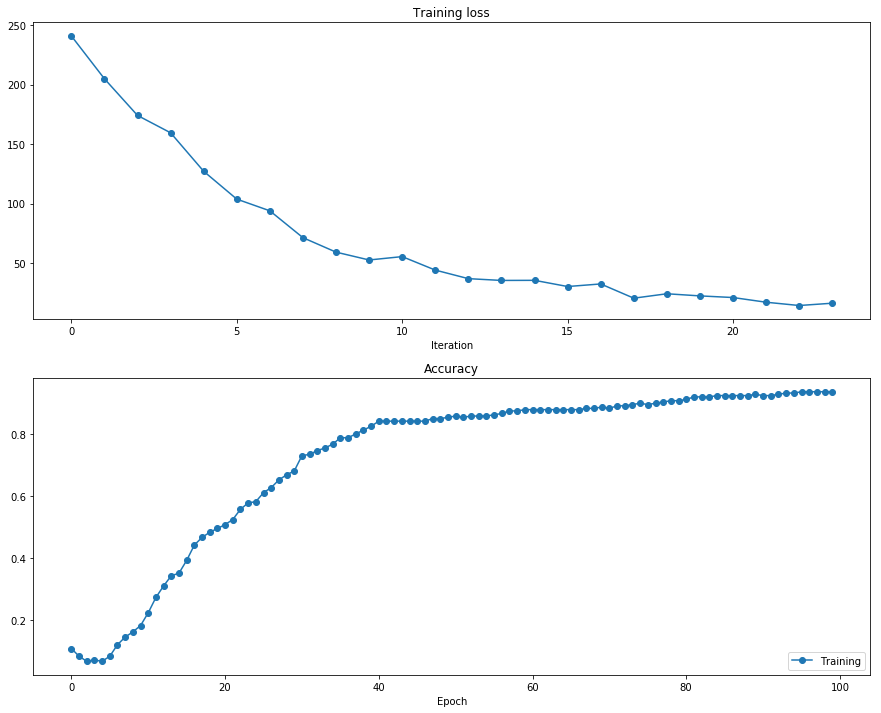

In [129]:
opt_params, loss_hist, train_acc_hist = results

# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.show()

In [132]:
# you can change the generated text length below.
text_length = 100

idx = 0
# you also can start from specific word. 
# since the words are all converted into lower case, make sure you put lower case below.
idx = int(np.where(np.asarray(word_list) == 'dog')[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [ word_list[i] for i in words]
print(' '.join(output))

dog goes toot. ducks say quack and fish go blub, and the seal goes ow ow ow. but there's one sound that no one knows... what does the fox say?  ring-ding-ding-ding-dingeringeding! gering-ding-ding-ding-dingeringeding! gering-ding-ding-ding-dingeringeding! what the fox say? hatee-hatee-hatee-ho! hatee-hatee-hatee-ho! hatee-hatee-hatee-ho! what the fox say?  big blue eyes, pointy nose, chasing mice, and digging holes. tiny paws, up the hill, suddenly you're standing still.  your fur is red, so beautiful, like an angel in disguise. but if you meet a friendly horse, will you communicate by mo-o-o-o-orse, mo-o-o-o-orse, mo-o-o-o-orse? how will you speak to that h-o-o-orse, h-o-o-orse, h-o-o-orse?


### Inline Question: Play around with different settings to get better understanding of its behavior and describe your observation. Make sure at least you cover the following points:
* Vanilla RNN vs LSTM (you can set different time steps and test with longer texts.)
* Problems in these approaches (there's no unique answer. just explain your own opinion from experiments.)
#### Ans: I did a couple of experimentation by changing the number of time steps, word vector size, changing cell type, changing the length of text. Following are the observations:
- Vanilla RNN vs LSTM: For the given song lyrics, LSTM performed better than Vanilla with only marginal 2-3% increased performance. However, when I increased corpora size, Vanilla RNN performance detiorated whereas LSTM RNN performed better with 90% accuracy. This validates that LSTM cells have better retention capacity and takes into account of saliency of words in the copora giving required attention to those words. Vanilla RNN requires less computational time compared to LSTM.
- Effect of window(Time step): I experimented on time steps from 10-70. Accuracy was just 70% when I used time step of 10. As I started increasing timesteps, accuracy improved. However, when I increased beyond 50, accuracy did not's improve much.
- Effect of word vector size: Increase the word vector size will give better represenation of input words leading to improvement in accuracy but computationally more expensive. Choosing the right vector size depends on the vocubulary and frequency of words in the corpora. 
- Effect of context(hidden) vector size: When I increased the input word vector size without changing the length of context vector didn't improve the accuracy. Therefore as we increase the word vector and size of corpora, increasing context vector length will significantly improve the accuracy.
- Effect of length of text: As I increase the size of the corpora, keeping word vector size unchanged didn't give better accuracy. So I changed the word vector size and I noticed that there was a significant imporovement in the accuracy. 

In [2]:
#Experimentation

In [4]:
from ipywidgets import widgets, interact
from IPython.display import display
input_text = widgets.Text()
input_text.value = "Paste your own text words here and hit Enter."
def f(x):
    print('set!!')
    print(x.value)
input_text.on_submit(f)
input_text
# copy paste your text source in the box below

set!!
Narendra Modi is best known for rising from humble beginnings to become prime minister of India. Narendra Modi grew up in the town of Vadnagar in India, the son of a street merchant. He entered politics as a youth and quickly rose through the ranks of Rashtriya Swayamsevak Sangh, a Hindu nationalist political party. Modi later joined the mainstream Bharatiya Janata Party in 1987, eventually becoming national secretary. In 2002, he was alleged to be responsible for the deaths of more than 1,000 Muslims during civil unrest but was later exonerated. In 2014 he was elected prime minister of India. Narendra Modi was born in the small town of Vadnagar, in northern Gujarat, India. His father was a street merchant who struggled to support the family. Young Narendra and his brother sold tea near a bus terminal to help out. Though an average student in school, Modi spent hours in the library and was known as a strong debater. In his early teens, he joined Akhil Bharatiya Vidyarthi Parishad

In [5]:
import re

text = re.split(' |\n',input_text.value.lower()) # all words are converted into lower case
outputSize = len(text)
word_list = list(set(text))
dataSize = len(word_list)
output = np.zeros(outputSize)
for i in range(0, outputSize):
    index = np.where(np.asarray(word_list) == text[i])
    output[i] = index[0]
data_labels = output.astype(np.int)
gt_labels = data_labels[1:]
data_labels = data_labels[:-1]

print('Input text size: %s' % outputSize)
print('Input word number: %s' % dataSize)

Input text size: 1010
Input word number: 515


In [10]:
# you can change the following parameters.
D = 20 # input dimention
H = 20 # hidden space dimention
T = 55 # timesteps
N = 10 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 10000) loss: 343.43938961946884
best performance 4.558969276511397%
(Epoch 1 / 100) Training Accuracy: 0.04558969276511397
(Iteration 101 / 10000) loss: 311.64234904496095
(Epoch 2 / 100) Training Accuracy: 0.04558969276511397
(Iteration 201 / 10000) loss: 302.6364743524925
best performance 4.658077304261645%
(Epoch 3 / 100) Training Accuracy: 0.04658077304261645
(Iteration 301 / 10000) loss: 294.61534226518876
best performance 5.2527254707631315%
(Epoch 4 / 100) Training Accuracy: 0.05252725470763132
(Iteration 401 / 10000) loss: 281.5267933866989
best performance 5.649157581764123%
(Epoch 5 / 100) Training Accuracy: 0.05649157581764123
(Iteration 501 / 10000) loss: 277.1561252122003
best performance 7.433102081268583%
(Epoch 6 / 100) Training Accuracy: 0.07433102081268583
(Iteration 601 / 10000) loss: 263.73728419817206
best performance 8.919722497522299%
(Epoch 7 / 100) Training Accuracy: 0.08919722497522299
(Iteration 701 / 10000) loss: 252.3063642638978
best perform

best performance 79.48463825569871%
(Epoch 60 / 100) Training Accuracy: 0.7948463825569871
(Iteration 6001 / 10000) loss: 55.79585573478636
best performance 80.17839444995045%
(Epoch 61 / 100) Training Accuracy: 0.8017839444995044
(Iteration 6101 / 10000) loss: 48.213611829951894
best performance 80.2775024777007%
(Epoch 62 / 100) Training Accuracy: 0.8027750247770069
(Iteration 6201 / 10000) loss: 49.13623628170579
best performance 80.97125867195243%
(Epoch 63 / 100) Training Accuracy: 0.8097125867195243
(Iteration 6301 / 10000) loss: 46.81656370888216
best performance 81.46679881070366%
(Epoch 64 / 100) Training Accuracy: 0.8146679881070367
(Iteration 6401 / 10000) loss: 44.51040975129996
(Epoch 65 / 100) Training Accuracy: 0.8136769078295342
(Iteration 6501 / 10000) loss: 43.90259536774367
best performance 81.76412289395441%
(Epoch 66 / 100) Training Accuracy: 0.817641228939544
(Iteration 6601 / 10000) loss: 46.60604983096762
best performance 82.3587710604559%
(Epoch 67 / 100) Train

In [143]:
# you can change the generated text length below.
text_length = 100

idx = 0
# you also can start from specific word. 
# since the words are all converted into lower case, make sure you put lower case below.
idx = int(np.where(np.asarray(word_list) == 'life')[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [ word_list[i] for i in words]
print(' '.join(output))

life to politics for his dad built and rented boats – kalam was a key figure in the may 1998 pokhran-ii tests, in which five nuclear devices were detonated in the rajasthan desert. although the madras institute of technology.  his hopes of becoming a fighter pilot was a street merchant who struggled to support the ranks of rashtriya swayamsevak sangh (rss), a hindu nationalist political party.  in june 2013, modi was elected bjp national secretary, a position from which he successfully helped settle internal leadership disputes, paving the ranks of rashtriya swayamsevak sangh (rss), a hindu nationalist political


In [11]:
# you can change the following parameters.
D = 20 # input dimention
H = 40 # hidden space dimention
T = 50 # timesteps
N = 10 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 10000) loss: 312.1815180643937
best performance 4.558969276511397%
(Epoch 1 / 100) Training Accuracy: 0.04558969276511397
(Iteration 101 / 10000) loss: 281.980365522294
(Epoch 2 / 100) Training Accuracy: 0.04558969276511397
(Iteration 201 / 10000) loss: 274.70771299331835
best performance 6.442021803766106%
(Epoch 3 / 100) Training Accuracy: 0.06442021803766106
(Iteration 301 / 10000) loss: 257.82292398356725
best performance 8.126858275520316%
(Epoch 4 / 100) Training Accuracy: 0.08126858275520317
(Iteration 401 / 10000) loss: 251.34161498011525
best performance 11.298315163528246%
(Epoch 5 / 100) Training Accuracy: 0.11298315163528246
(Iteration 501 / 10000) loss: 237.73578072536142
best performance 13.875123885034688%
(Epoch 6 / 100) Training Accuracy: 0.13875123885034688
(Iteration 601 / 10000) loss: 212.62290669208832
best performance 17.244796828543112%
(Epoch 7 / 100) Training Accuracy: 0.17244796828543113
(Iteration 701 / 10000) loss: 200.44567691731763
best perf

(Epoch 61 / 100) Training Accuracy: 0.9900891972249752
(Iteration 6101 / 10000) loss: 8.421119123840112
best performance 99.20713577799802%
(Epoch 62 / 100) Training Accuracy: 0.9920713577799801
(Iteration 6201 / 10000) loss: 8.084594179230788
(Epoch 63 / 100) Training Accuracy: 0.9910802775024777
(Iteration 6301 / 10000) loss: 7.772985763071605
(Epoch 64 / 100) Training Accuracy: 0.9920713577799801
(Iteration 6401 / 10000) loss: 7.213830199954074
(Epoch 65 / 100) Training Accuracy: 0.9920713577799801
(Iteration 6501 / 10000) loss: 7.534836764258048
(Epoch 66 / 100) Training Accuracy: 0.9920713577799801
(Iteration 6601 / 10000) loss: 6.246403755380235
best performance 99.40535183349851%
(Epoch 67 / 100) Training Accuracy: 0.9940535183349851
(Iteration 6701 / 10000) loss: 7.026835905248956
best performance 99.50445986124876%
(Epoch 68 / 100) Training Accuracy: 0.9950445986124876
(Iteration 6801 / 10000) loss: 7.460199288457245
(Epoch 69 / 100) Training Accuracy: 0.9950445986124876
(Iter

In [12]:
# you can change the following parameters.
D = 10 # input dimention
H = 20 # hidden space dimention
T = 50 # timesteps
N = 20 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 5000) loss: 312.1816391253541
best performance 4.360753221010902%
(Epoch 1 / 100) Training Accuracy: 0.04360753221010902
best performance 4.856293359762141%
(Epoch 2 / 100) Training Accuracy: 0.048562933597621406
(Iteration 101 / 5000) loss: 280.92172960593314
(Epoch 3 / 100) Training Accuracy: 0.04558969276511397
(Epoch 4 / 100) Training Accuracy: 0.04558969276511397
(Iteration 201 / 5000) loss: 274.7405657079813
(Epoch 5 / 100) Training Accuracy: 0.04558969276511397
(Epoch 6 / 100) Training Accuracy: 0.04757185332011893
(Iteration 301 / 5000) loss: 266.97670726519607
(Epoch 7 / 100) Training Accuracy: 0.04658077304261645
(Epoch 8 / 100) Training Accuracy: 0.04757185332011893
(Iteration 401 / 5000) loss: 258.8291646058601
best performance 5.2527254707631315%
(Epoch 9 / 100) Training Accuracy: 0.05252725470763132
best performance 6.838453914767097%
(Epoch 10 / 100) Training Accuracy: 0.06838453914767097
(Iteration 501 / 5000) loss: 247.46551421569202
best performance 7.5

best performance 71.15956392467791%
(Epoch 74 / 100) Training Accuracy: 0.711595639246779
(Iteration 3701 / 5000) loss: 68.39430059002336
best performance 71.95242814667988%
(Epoch 75 / 100) Training Accuracy: 0.7195242814667988
best performance 72.15064420218039%
(Epoch 76 / 100) Training Accuracy: 0.7215064420218038
(Iteration 3801 / 5000) loss: 67.620231597925
(Epoch 77 / 100) Training Accuracy: 0.7215064420218038
best performance 72.8444003964321%
(Epoch 78 / 100) Training Accuracy: 0.7284440039643211
(Iteration 3901 / 5000) loss: 65.43652718897397
(Epoch 79 / 100) Training Accuracy: 0.7284440039643211
best performance 73.53815659068384%
(Epoch 80 / 100) Training Accuracy: 0.7353815659068385
(Iteration 4001 / 5000) loss: 64.86259582099694
best performance 74.23191278493559%
(Epoch 81 / 100) Training Accuracy: 0.7423191278493558
(Epoch 82 / 100) Training Accuracy: 0.7423191278493558
(Iteration 4101 / 5000) loss: 62.4965804900847
best performance 74.62834489593658%
(Epoch 83 / 100) T

In [13]:
# you can change the following parameters.
D = 30 # input dimention
H = 50 # hidden space dimention
T = 50 # timesteps
N = 20 # batch size
max_epoch = 100 # max epoch size

loss_func = temporal_softmax_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = { 'data_train': data_labels, 'labels_train': gt_labels }

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

(Iteration 1 / 5000) loss: 312.1878464843791
best performance 4.757185332011893%
(Epoch 1 / 100) Training Accuracy: 0.04757185332011893
(Epoch 2 / 100) Training Accuracy: 0.04558969276511397
(Iteration 101 / 5000) loss: 274.1878796518771
(Epoch 3 / 100) Training Accuracy: 0.04658077304261645
best performance 7.730426164519326%
(Epoch 4 / 100) Training Accuracy: 0.07730426164519326
(Iteration 201 / 5000) loss: 254.52640491816936
best performance 10.901883052527255%
(Epoch 5 / 100) Training Accuracy: 0.10901883052527254
best performance 12.190287413280476%
(Epoch 6 / 100) Training Accuracy: 0.12190287413280476
(Iteration 301 / 5000) loss: 222.4868485757028
best performance 14.568880079286423%
(Epoch 7 / 100) Training Accuracy: 0.14568880079286423
best performance 17.046580773042617%
(Epoch 8 / 100) Training Accuracy: 0.17046580773042616
(Iteration 401 / 5000) loss: 190.0309132304701
best performance 20.317145688800792%
(Epoch 9 / 100) Training Accuracy: 0.20317145688800792
best performan

(Iteration 3801 / 5000) loss: 8.334230085125458
best performance 98.81070366699703%
(Epoch 77 / 100) Training Accuracy: 0.9881070366699702
(Epoch 78 / 100) Training Accuracy: 0.9881070366699702
(Iteration 3901 / 5000) loss: 8.582858424518747
best performance 98.90981169474728%
(Epoch 79 / 100) Training Accuracy: 0.9890981169474727
(Epoch 80 / 100) Training Accuracy: 0.9890981169474727
(Iteration 4001 / 5000) loss: 6.939620459442425
best performance 99.10802775024777%
(Epoch 81 / 100) Training Accuracy: 0.9910802775024777
(Epoch 82 / 100) Training Accuracy: 0.9910802775024777
(Iteration 4101 / 5000) loss: 7.006811061317809
(Epoch 83 / 100) Training Accuracy: 0.9910802775024777
(Epoch 84 / 100) Training Accuracy: 0.9910802775024777
(Iteration 4201 / 5000) loss: 6.7698842132464945
best performance 99.20713577799802%
(Epoch 85 / 100) Training Accuracy: 0.9920713577799801
(Epoch 86 / 100) Training Accuracy: 0.9910802775024777
(Iteration 4301 / 5000) loss: 5.828152647947482
(Epoch 87 / 100) 